# Training of Fully Convolutional Network

The aim of this notebook is to train..................

### $\bullet$ Importing libraries and utilitary functions

In [1]:
# Import python libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
%load_ext autoreload
%autoreload 2
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import tensorflow
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Import utilitary functions and module defining the Unet model.
from utils import get_dataset_from_folders
from train_data_augmentation import make_train_generator
from model import Model
from plots import plot_history

In [2]:
# Set seeds of random number generators to guarantee reproducibility.
#np.random.seed(1)
#tensorflow.random.set_seed(2)

### $\bullet$ Setting size of the input image and different paths

In [3]:
# Shape of the inputs of the deep network.
images_shape = (28, 28, 1)

# Variables defining the path to the dataset.
train_input_path  = '../Dataset/train/input/'
train_output_path = '../Dataset/train/output/'
val_input_path    = '../Dataset/validation/input/'
val_output_path   = '../Dataset/validation/output/'
test_input_path   = '../Dataset/test/input/'
test_output_path  = '../Dataset/test/output/'

# Variable defining where models will be stored.
model_save_path = "../Models/FCN/"

### $\bullet$ Load images from the dataset

In [4]:
train_images, train_masks = get_dataset_from_folders(train_input_path, train_output_path, images_shape)
val_images, val_masks = get_dataset_from_folders(val_input_path, val_output_path, images_shape)
test_images, test_masks = get_dataset_from_folders(test_input_path, test_output_path, images_shape)

print(f'Training set contains {len(train_images)} images.')
print(f'Validation set contains {len(val_images)} images.')
print(f'Test set contains {len(test_images)} images.')

Training set contains 606 images.
Validation set contains 96 images.
Test set contains 510 images.


### $\bullet$ Training original model which used no data augmentations

In [5]:
# Setting up parameters used for training
number_epochs = 100
batch_size = 2
early_stopping = EarlyStopping(patience=50, verbose=1)
model_checkpoint = ModelCheckpoint(filepath=unet_original_save_path, save_weights_only=False, monitor='val_accuracy', mode='max', save_best_only=True)

# Building Unet model.
model = fully_convolutional_network(images_shape, show_summary=True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 2320        conv2d[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 16) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [6]:
# Training
history = model.fit(train_images, train_masks, validation_data = (val_images, val_masks), batch_size = batch_size, epochs=number_epochs, callbacks=[early_stopping, model_checkpoint])

Train on 606 samples, validate on 96 samples
Epoch 1/100
604/606 [============================>.] - ETA: 0s - loss: 0.8820 - accuracy: 0.9413WARNING:tensorflow:From C:\Anaconda3\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1786: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ../Models/Unet Original/assets
606/606 [==============================] - 30s 50ms/sample - loss: 0.8793 - accuracy: 0.9414 - val_loss: 0.0658 - val_accuracy: 0.9740
Epoch 2/100
606/606 [==============================] - 25s 41ms/sample - loss: 0.0653 - accuracy: 0.9752 - val_loss: 0.0502 - val_accuracy: 0.9807
Epoch 3/100
606/606 [==============================] - 24s 40ms/sample - loss: 0.0563 - accuracy: 0.9783 - val_loss: 0.0464 - val_accuracy: 0.9821
Epoch 4/10

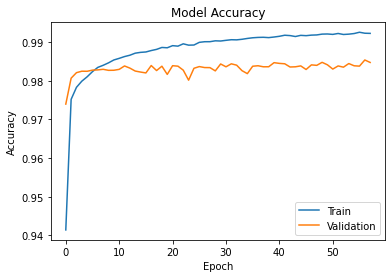

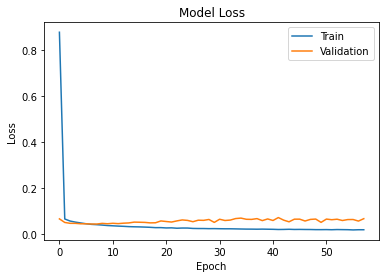

In [7]:
plot_history(history)

In [8]:
# Load best model saved by ModelCheckpoint
model = tensorflow.keras.models.load_model(unet_original_save_path)

# Evaluate best model
model.evaluate(test_images, test_masks);

510/510 [==============================] - 7s 14ms/sample - loss: 0.0359 - accuracy: 0.9905
